### $\boxed{NAMES: Jean\quad Modeste\quad MUSHIMIYIMANA\\
COURSE:Data\quad Assinilation\quad and\quad Climate}$

#### Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics 
import warnings
warnings.filterwarnings("ignore")

### Question 2

#### (a) Process and Data models

_Givens:_

In [ ]:
alpha=0.8
r=0.1
q=0.4
T=30

In [ ]:
def process(T,alpha,q):
    x0=np.random.normal(0,1)
    x=np.zeros(T+1)
    x[0]=x0
    for i in range(1,T+1,1):
        delta=np.random.normal(0,q)
        x[i]=alpha*x[i-1]+delta
    return x


Xdata=process(T,alpha,q)
print(Xdata)

[ 1.95466392  2.12475716  1.78872623  1.57789342  1.09679396  0.64846373
  0.5772196   0.55799455  0.15992194  0.08478455 -0.5963685  -1.00603941
 -0.90014073 -0.14234969 -0.16723443 -0.41254634 -0.66016934 -0.92734794
 -1.08756674 -0.24434183 -0.0720018   0.06539202  0.2785557   0.0111397
  0.66321396  0.44711539 -0.20557158 -0.07246606 -0.26724523 -0.03882964
  0.23504317]


In [ ]:
def data(T,r,x):
    T1=10
    T2=20
    y=np.zeros(T+1)
    H_t=np.zeros(T+1)
    for i in range(T+1):
        eps=np.random.normal(0,r)
        if i>T1 and i<=T2:
            #____________________________H_t that will be used in filtering
            H_t[i]=0.1
            y[i]=0.1*x[i]+eps
        else:
            H_t[i]=1
            y[i]=x[i]+eps
    return [y,H_t]


Result=data(T,r,Xdata)
Ydata=Result[0]
H=Result[1]

__Plot for the models__

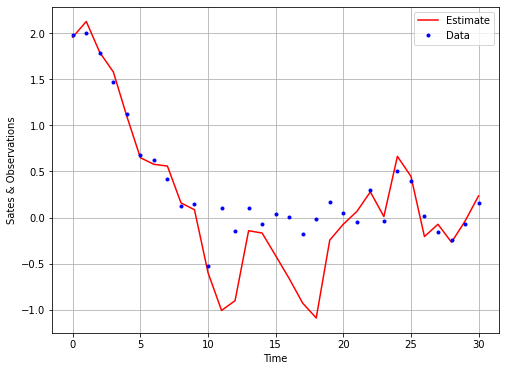

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(Xdata,"-r", label="Estimate")
plt.plot(Ydata, ".b", label="Data")
plt.xlabel('Time')
plt.ylabel('Sates & Observations')
plt.legend()
plt.grid()
plt.show()

From the result above it is observed that $h$ has an effect on the data. For the case with $h=1$ the data model is trying to follow the process model as considered in the parts of the plot beyond the time interval from 10 up to 20, and this is where $h=0.1$. 

#### (b) Kalman filter and forecast the state estimates

In [ ]:
def Kalman_FF(M,mu_00,Q,E_00,H,R,y):
    n=len(y)
    mu_old = np.zeros(n-1)
    E_old = np.zeros(n-1)
    mu_new = np.zeros(n)
    E_new = np.zeros(n)
    X_fil = np.zeros(n-1)
    X_for = np.zeros(n-1)
    mu_new[0] = mu_00
    E_new[0] = E_00
    for t in range(1,n):
        mu_old[t-1] = M * mu_new[t-1]
        E_old[t-1] = Q + M * E_new[t-1] * M
        K = (E_old[t-1] * H[t]) / (H[t] * E_old[t-1] * H[t] + R)
        mu_new[t] = mu_old[t-1] + K * (y[t] - H[t] * mu_old[t-1])
        E_new[t] = (1 - K * H[t]) * E_old[t-1]
        X_fil[t-1] = np.random.normal(mu_new[t],np.sqrt(E_new[t]))
        X_for[t-1] = np.random.normal(mu_old[t-1],np.sqrt(E_old[t-1]))
    return [mu_old, E_old,mu_new,E_new,X_fil,X_for]

In [ ]:
M=alpha
mu_00=0
Q=q**2
E_00=1
H=Result[1]
R=r**2
y=Ydata
OUTPUT=Kalman_FF(M,mu_00,Q,E_00,H,R,y)
X_FI=OUTPUT[4]
X_FO=OUTPUT[5]

__Plots for the states and data together with the filtered and forecasted state estimates__

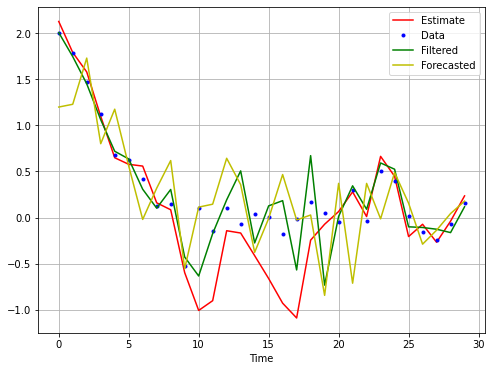

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(Xdata[1:],"-r", label="Estimate")
plt.plot(Ydata[1:], ".b", label="Data")
plt.plot(X_FI,"-g", label="Filtered")
plt.plot(X_FO, "-y", label="Forecasted")
plt.xlabel('Time')
plt.grid()
plt.legend()
plt.show()

As mentioned above, in the time interval between 10 and 20 where $h=0.1$ the plots for data, process, filtered and forecasted are not fitting one each other well as has been done in other parts.

#### (c) The use of the standard deviation in plotting the filtered and forecasted estimates together with their errors

In [ ]:
#------------------------------- for filter
STD_FI=np.sqrt(OUTPUT[3][1:])
MU_NEW=OUTPUT[2][1:]
#------------------------------- for forecast
STD_FO=np.sqrt(OUTPUT[1])
MU_OLD=OUTPUT[0]

__I. Plot for filtered__

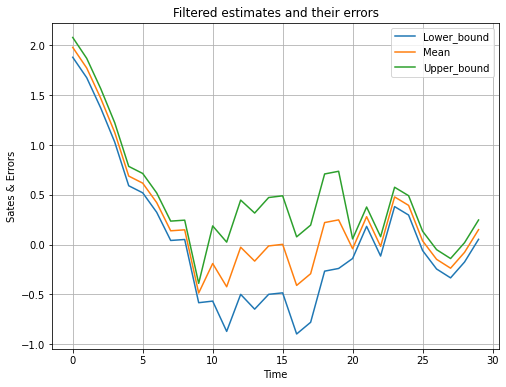

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(MU_NEW-STD_FI, label = 'Lower_bound')
plt.plot(MU_NEW, label = 'Mean')
plt.plot(MU_NEW+STD_FI, label = 'Upper_bound')
plt.title("Filtered estimates and their errors")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sates & Errors')
plt.grid()
plt.show()

From the graph the mean filtered states is lying within the lower and upper bounds. They are closer each other in the time intervals beyond 10 and 20 where due to the effect of $h$; whereas within the the interval of 10 and 20 there is large deviation on both bounds. 

__II. Plot for forecasted__

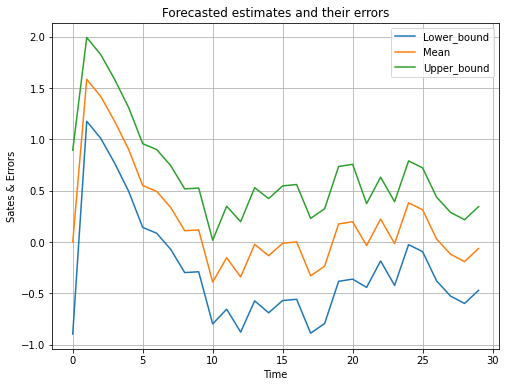

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(MU_OLD-STD_FO, label = 'Lower_bound')
plt.plot(MU_OLD, label = 'Mean')
plt.plot(MU_OLD+STD_FO, label = 'Upper_bound')
plt.title("Forecasted estimates and their errors")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sates & Errors')
plt.grid()
plt.show()

On this case, the plots are not closer eacher other by comparing with the filtered case which means that there is a big deviation of forecasted states from their mean values; and as expected mean forecasted states are lying within the bounds. 

### Question 3

In [ ]:
alp=0.9
r=0.005
q=0.001
T=40

#### (a) Process and Data models

In [ ]:
def PROCESS(T,alpha,q):
    x0=np.random.normal(0.1,0.01)
    x=np.zeros(T+1)
    x[0]=x0
    for i in range(1,T+1,1):
        delta=np.random.normal(0,q)
        x[i]=alpha*x[i-1]*(1-x[i-1])+delta
    return x


XDATA=PROCESS(T,alp,q)

In [ ]:
def DATA(x,r):
    N=len(x)
    y=np.zeros(N)
    for i in range(N-1):
        eps=np.random.normal(0,r)
        y[i]=x[i+1]+eps
    return y


YDATA=DATA(XDATA,r)

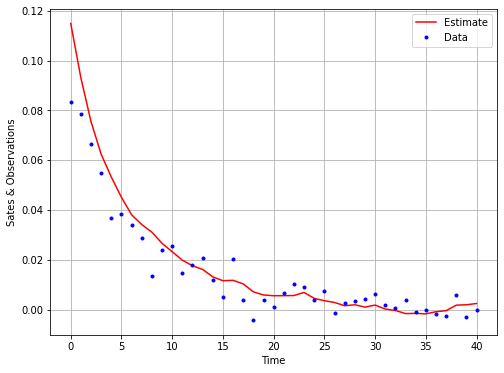

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(XDATA,"-r", label="Estimate")
plt.plot(YDATA, ".b", label="Data")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sates & Observations')
plt.grid()
plt.show()

#### (b) Extended Kalman filter and forecast the state estimates

In [ ]:
def APPROXIMATION(alp_0,PROCESS):
    N=len(PROCESS)
    M1=np.zeros(N)
    for i in range(N):
        M1[i]=alp_0*(1-2*PROCESS[i])
    return M1

In [ ]:
def KALMAN_E(MU_0,E_0,M,M1,Q,R,H,y):
    N = len(y)
    MU_OLD = np.zeros(N)
    E_OLD = np.zeros(N)
    MU_NEW = np.zeros(N+1)
    MU_NEW[0] = MU_0
    E_NEW = np.zeros(N+1)
    E_NEW[0] = E_0
    for t in range(1,N+1):
        MU_OLD[t-1] = M*MU_NEW[t-1]
        E_OLD[t-1] = Q + M1[t-1]*E_NEW[t-1]*M1[t-1]
        k = E_OLD[t-1]*H*(H*E_OLD[t-1]*H + R)**-1
        MU_NEW[t] = MU_OLD[t-1] + k*(y[t-1] - H*MU_OLD[t-1])
        E_NEW[t] = (1 - k*H)*E_OLD[t-1] 
    return MU_OLD, MU_NEW[1:], E_OLD, E_NEW [1:]

In [ ]:
def ESTIMATION(MU_OLD,MU_NEW,E_OLD,E_NEW,y):
    N = len(y)
    X_FO = np.zeros(N)
    X_FI = np.zeros(N)
    for t in range(0,N):
        X_FO[t] = np.random.normal(MU_OLD[t],np.sqrt(E_OLD[t]))
        X_FI[t] = np.random.normal(MU_NEW[t],np.sqrt(E_NEW[t]))
    return X_FI, X_FO 

q=0.001
r=0.005
MU_0 =0.1
E_0=0.01
Q = q**2
R = r**2
H = 1
alp_0=0.9

XDATA_1=PROCESS(T,alp_0,q)

M1=APPROXIMATION(alp_0,XDATA_1)
MU_OLD,MU_NEW,E_OLD,E_NEW= KALMAN_E(MU_0,E_0,alp_0,M1,Q,R,H,YDATA)
XFI1, XFO1 = ESTIMATION(MU_OLD,MU_NEW,E_OLD,E_NEW,YDATA)

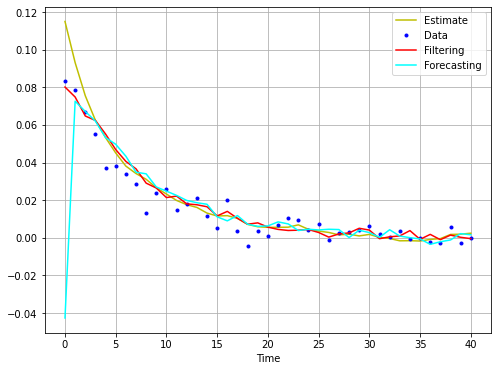

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(XDATA,"-y", label="Estimate")
plt.plot(YDATA, ".b", label="Data")
plt.plot(XFI1, label = 'Filtering', color='red')
plt.plot(XFO1, label = 'Forecasting', color ='cyan')
plt.xlabel('Time')
plt.legend()
plt.xlabel('Time')
plt.grid()
plt.show()

Mostly, estimate states, filtered and forecast states are trying to be closer compare to the data which are not being fitted well by them.

#### (c) The use of the standard deviation in plotting the filtered and forecasted estimates together with their errors

In [ ]:
#------------------------------- for filter
STD_FI1=np.sqrt(E_NEW)
MU_NEW1=MU_NEW
#------------------------------- for forecast
STD_FO1=np.sqrt(E_OLD)
MU_OLD1=MU_OLD

__Plot for filter__

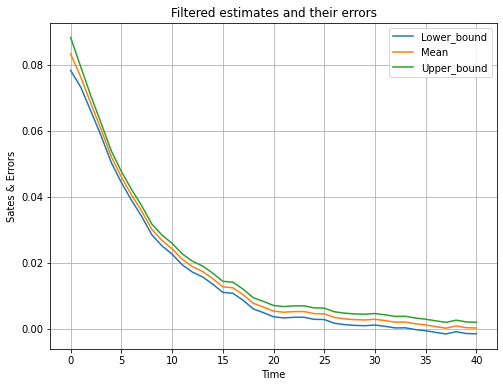

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(MU_NEW1-STD_FI1, label = 'Lower_bound')
plt.plot(MU_NEW1, label = 'Mean')
plt.plot(MU_NEW1+STD_FI1, label = 'Upper_bound')
plt.title("Filtered estimates and their errors")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sates & Errors')
plt.grid()
plt.show()

The filtered estimate mean as usual is lying between the upper and lower bounds. As from the graph it is recognized that the deviation of filtered estimates values is small because the plots are closer to each other. 

__Plot for forecast__

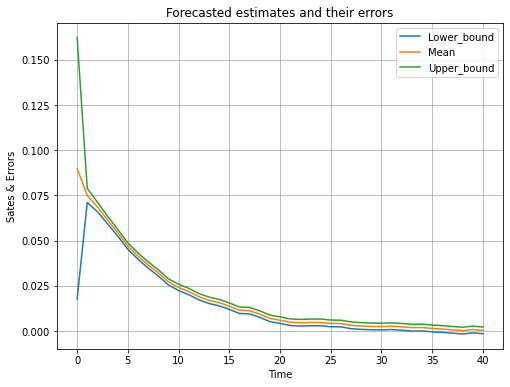

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(MU_OLD1-STD_FO1, label = 'Lower_bound')
plt.plot(MU_OLD1, label = 'Mean')
plt.plot(MU_OLD1+STD_FO1, label = 'Upper_bound')
plt.title("Forecasted estimates and their errors")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sates & Errors')
plt.grid()
plt.show()

Even though at the begining the forecasted estimates are far way from the their mean, around at time ($t=2$) all plots have became closer which implies that there is a very small deviation of their values from the mean forecasted estmate values.